In [1]:
import pandas as pd
import numpy as np
import pypsa

from pathlib import Path

In [2]:
path = Path.cwd().parent / 'resources' / 'networks'

In [3]:
from pathlib import Path
import geopandas as gpd

eso = gpd.read_file(Path.cwd().parent / 'data' / 'eso_zonal_shapes.geojson')
eso = eso.set_index("name")
eso = eso.loc[eso.index.str.contains("GB")]
# eso.to_file(Path.cwd().parent / 'data' / 'eso_zones.geojson', driver='GeoJSON')

fti = gpd.read_file(Path.cwd().parent / 'data' / 'fti_zonal_shapes.geojson')
fti = fti.rename(columns={"NEW_ZONE1": "name"}).set_index("name")[["geometry"]].set_crs("EPSG:27700").to_crs("EPSG:4326")

In [4]:
def make_busmap(n, zones):
    df = gpd.GeoDataFrame(
        index=n.buses.index,
        geometry=gpd.points_from_xy(n.buses.x, n.buses.y),
        crs="EPSG:4326",
        )

    return gpd.sjoin(df, zones, how="left", op="within").rename(columns={"index_right": 0})[0]

print(make_busmap(n, fti))


NameError: name 'n' is not defined

In [ ]:
import pypsa
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from pathlib import Path

In [18]:
fti = gpd.read_file(Path.cwd().parent / 'resources' / 'regions_onshore_elec_2024-03-02_35_s_fti.geojson')
eso = gpd.read_file(Path.cwd().parent / 'resources' / 'regions_onshore_elec_2024-03-02_35_s_eso.geojson')
nodal = gpd.read_file(Path.cwd().parent / 'resources' / 'regions_onshore_2024-03-02_35_s.geojson')

fti_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35_s_fti.nc')
eso_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35_s_eso.nc')
nodal_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35_s.nc')
n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35.nc')

INFO:pypsa.io:Imported network prepared_live_2024-03-02_35_s_fti.nc has buses, carriers, generators, lines, links, loads
INFO:pypsa.io:Imported network prepared_live_2024-03-02_35_s_eso.nc has buses, carriers, generators, lines, links, loads
INFO:pypsa.io:Imported network prepared_live_2024-03-02_35_s.nc has buses, carriers, generators, lines, links, loads
INFO:pypsa.io:Imported network prepared_live_2024-03-02_35.nc has buses, carriers, generators, lines, links, loads, transformers


In [20]:
n.generators

,bus,carrier,marginal_cost,p_nom,control,type,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
PETDG-1,6053,gas-fired,40.000,0.0,PQ,,False,0.0,inf,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
BRGDG-1,6038,gas-fired,40.000,0.0,PQ,,False,0.0,inf,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
AG-NHAV02,5913,gas,40.000,24.0,PQ,,False,0.0,inf,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
CMSTW-1,6443,onwind,0.012,33.0,PQ,,False,0.0,inf,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
ROTHW-1,6448,onwind,0.012,11.0,PQ,,False,0.0,inf,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SGRWO-1,6487,offwind,0.012,86.0,PQ,,False,0.0,inf,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
CLDRW-1,6448,onwind,0.012,10.0,PQ,,False,0.0,inf,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
ABRBO-1,6487,offwind,0.012,28.0,PQ,,False,0.0,inf,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [24]:
nodal_n

PyPSA Network 'PyPSA-Eur'
Components:
 - Bus: 302
 - Carrier: 2
 - Generator: 152
 - Line: 436
 - Link: 4
 - Load: 230
Snapshots: 1

In [25]:
fti_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35_s_fti.nc')
eso_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35_s_eso.nc')
nodal_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35_s.nc')

def fixed_solve(n):
    n.generators.loc[:, "p_nom"] *= n.loads.p_set.sum() / n.generators.p_nom.sum() * 8
    n.optimize(solver_name="gurobi")

fixed_solve(nodal_n)
# fixed_solve(eso_n)
# fixed_solve(fti_n)

INFO:pypsa.io:Imported network prepared_live_2024-03-02_35_s_fti.nc has buses, carriers, generators, lines, links, loads
INFO:pypsa.io:Imported network prepared_live_2024-03-02_35_s_eso.nc has buses, carriers, generators, lines, links, loads
INFO:pypsa.io:Imported network prepared_live_2024-03-02_35_s.nc has buses, carriers, generators, lines, links, loads
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-qzj45lcj.lp
Reading time = 0.06 seconds
obj: 1622 rows, 592 columns, 3891 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 1622 rows, 592 columns and 3891 nonzeros
Model fingerprint: 0xebc160ce
Coefficient statistics:
  Matrix range     [5e-03, 5e+01]
  Objective range  [1e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 4e+04]
Presolve removed 1387 rows and 276 columns
Presolve time: 0.03s
Presolved: 235 rows, 316 columns, 1762 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.767269e+05   0.000000e+00      0s
     203    1.7585968e+05   0.000000e+00   0.000000e+0

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 592 primals, 1622 duals
Objective: 1.76e+05
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


In [34]:
# nodal_n.generators_t.p
# nodal_n.lines_t.p0

nodal_n.buses_t.marginal_price

Bus,8838,8013,8649,4950,4951,4952,4953,4955,4956,4958,...,8021,8578,7469,8027,8016,8019,7458,8283,8093,7908
snapshot,,,,,,,,,,,,,,,,,,,,,
2024-02-20 00:30:00,23.418532,-0.039378,24.887043,16.965059,20.816712,16.467485,23.311148,22.527949,28.527733,17.09439,...,23.200129,28.484415,7.897469,9.469633,29.882749,0.429607,29.840046,15.277429,27.946475,23.001982


In [36]:
nodal_n.generators_t

{'p_min_pu': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'p_max_pu': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'p_set': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'q_set': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'marginal_cost': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'marginal_cost_quadratic': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'efficiency': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'stand_by_cost': Empty DataFrame
 Columns: []
 Index: [2024-02-20 00:30:00],
 'p': Generator              4950 PV  4956 battery  4956 offwind  4960 nuclear  \
 snapshot                                                                   
 2024-02-20 00:30:00  17.748209           0.0    417.082919           0.0   
 
 Generator            4967 biomass  4969 gas  4969 interconnector  4970 gas  \
 snapshot                                                                     

INFO:pypsa.io:Imported network prepared_live_2024-02-07_35_s_eso.nc has buses, carriers, generators, lines, links, loads
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds = self.data.assign_coords({group_dim: idx})
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Li

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-wycw4k83.lp
Reading time = 0.02 seconds
obj: 266 rows, 119 columns, 420 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 266 rows, 119 columns and 420 nonzeros
Model fingerprint: 0xe840f9a2
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+04]
Presolve removed 239 rows and 52 columns
Presolve time: 0.01s
Presolved: 27 rows, 67 columns, 128 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.236060e+04   0.000000e+00      0s
      27    1.2091492e+06   0.000000e+00   0.000000e+00      0s

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 119 primals, 266 duals
Objective: 1.21e+06
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


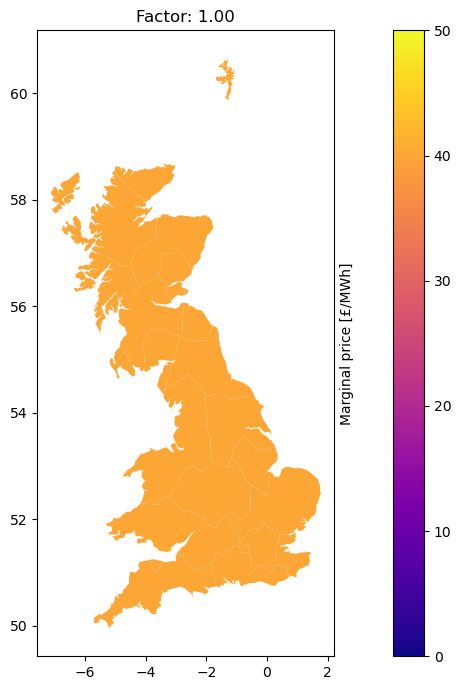

INFO:pypsa.io:Imported network prepared_live_2024-02-07_35_s_eso.nc has buses, carriers, generators, lines, links, loads
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds = self.data.assign_coords({group_dim: idx})
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Li

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-zieauh_p.lp
Reading time = 0.02 seconds
obj: 266 rows, 119 columns, 420 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 266 rows, 119 columns and 420 nonzeros
Model fingerprint: 0xea685db1
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 1e+04]
Presolve removed 239 rows and 52 columns
Presolve time: 0.02s
Presolved: 27 rows, 67 columns, 128 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   5.813934e+04   0.000000e+00      0s
      26    1.2091492e+06   0.000000e+00   0.000000e+00      0s

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 119 primals, 266 duals
Objective: 1.21e+06
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


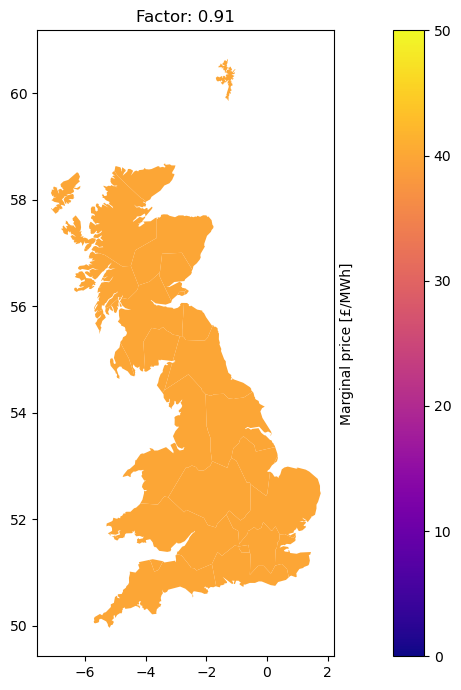

INFO:pypsa.io:Imported network prepared_live_2024-02-07_35_s_eso.nc has buses, carriers, generators, lines, links, loads
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds = self.data.assign_coords({group_dim: idx})
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Li

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-jg0h5_jd.lp
Reading time = 0.02 seconds
obj: 266 rows, 119 columns, 420 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 266 rows, 119 columns and 420 nonzeros
Model fingerprint: 0x58a30612
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 1e+04]
Presolve removed 239 rows and 52 columns
Presolve time: 0.01s
Presolved: 27 rows, 67 columns, 128 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   5.392993e+04   0.000000e+00      0s
      29    1.2091492e+06   0.000000e+00   0.000000e+00      0s

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 119 primals, 266 duals
Objective: 1.21e+06
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


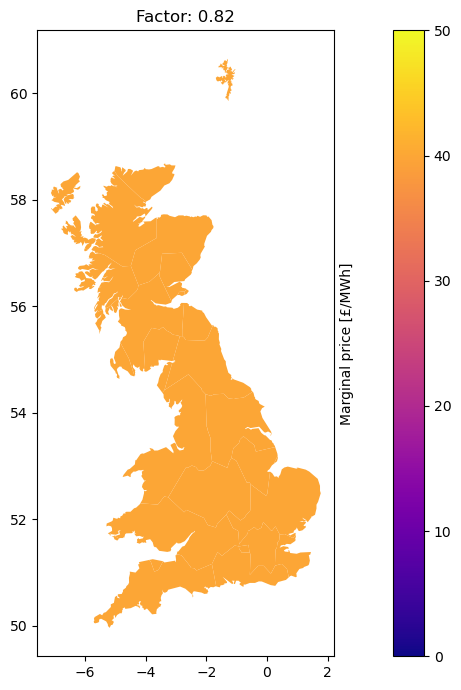

INFO:pypsa.io:Imported network prepared_live_2024-02-07_35_s_eso.nc has buses, carriers, generators, lines, links, loads
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds = self.data.assign_coords({group_dim: idx})
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Li

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-yv2zx3az.lp
Reading time = 0.01 seconds
obj: 266 rows, 119 columns, 420 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 266 rows, 119 columns and 420 nonzeros
Model fingerprint: 0x771af226
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 1e+04]
Presolve removed 239 rows and 52 columns
Presolve time: 0.01s
Presolved: 27 rows, 67 columns, 128 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   4.940797e+04   0.000000e+00      0s
      32    1.2091492e+06   0.000000e+00   0.000000e+00      0s

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 119 primals, 266 duals
Objective: 1.21e+06
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


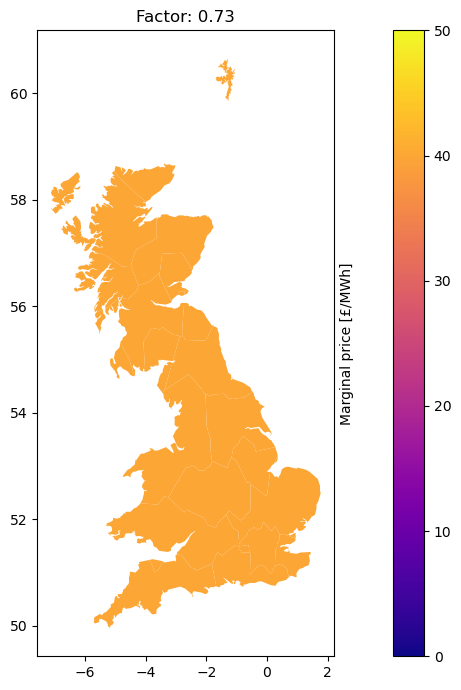

INFO:pypsa.io:Imported network prepared_live_2024-02-07_35_s_eso.nc has buses, carriers, generators, lines, links, loads
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds = self.data.assign_coords({group_dim: idx})
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Li

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-mqzjkokp.lp
Reading time = 0.02 seconds
obj: 266 rows, 119 columns, 420 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 266 rows, 119 columns and 420 nonzeros
Model fingerprint: 0xcc0d6980
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 1e+04]
Presolve removed 239 rows and 52 columns
Presolve time: 0.01s
Presolved: 27 rows, 67 columns, 128 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   4.485595e+04   0.000000e+00      0s
      20    1.2104219e+06   0.000000e+00   0.000000e+00      0s

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 119 primals, 266 duals
Objective: 1.21e+06
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


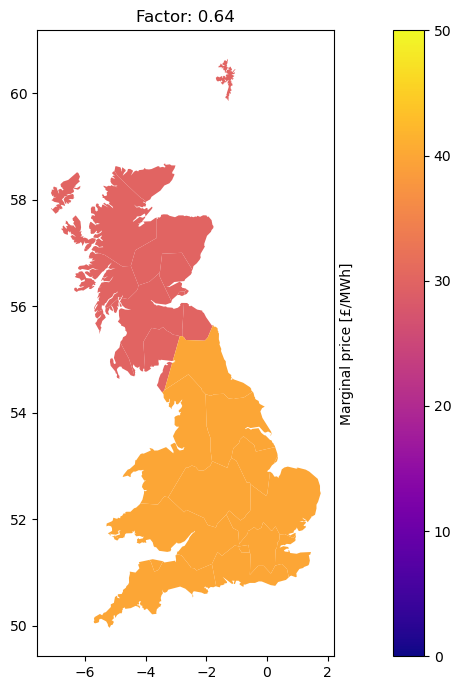

INFO:pypsa.io:Imported network prepared_live_2024-02-07_35_s_eso.nc has buses, carriers, generators, lines, links, loads
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds = self.data.assign_coords({group_dim: idx})
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Li

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-295w9xht.lp
Reading time = 0.03 seconds
obj: 266 rows, 119 columns, 420 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 266 rows, 119 columns and 420 nonzeros
Model fingerprint: 0x5c22812c
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 9e+03]
Presolve removed 239 rows and 52 columns
Presolve time: 0.01s
Presolved: 27 rows, 67 columns, 128 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   4.028358e+04   0.000000e+00      0s
      21    1.2198791e+06   0.000000e+00   0.000000e+00      0s

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 119 primals, 266 duals
Objective: 1.22e+06
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


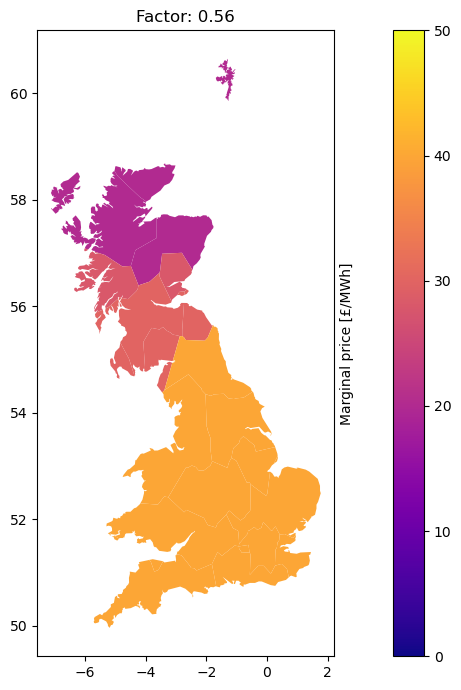

INFO:pypsa.io:Imported network prepared_live_2024-02-07_35_s_eso.nc has buses, carriers, generators, lines, links, loads
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds = self.data.assign_coords({group_dim: idx})
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Li

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-nef7c2qy.lp
Reading time = 0.02 seconds
obj: 266 rows, 119 columns, 420 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 266 rows, 119 columns and 420 nonzeros
Model fingerprint: 0xb4edea5e
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 8e+03]
Presolve removed 238 rows and 51 columns
Presolve time: 0.01s
Presolved: 28 rows, 68 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   3.700272e+04   0.000000e+00      0s
      30    1.2320810e+06   0.000000e+00   0.000000e+00      0s

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 119 primals, 266 duals
Objective: 1.23e+06
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


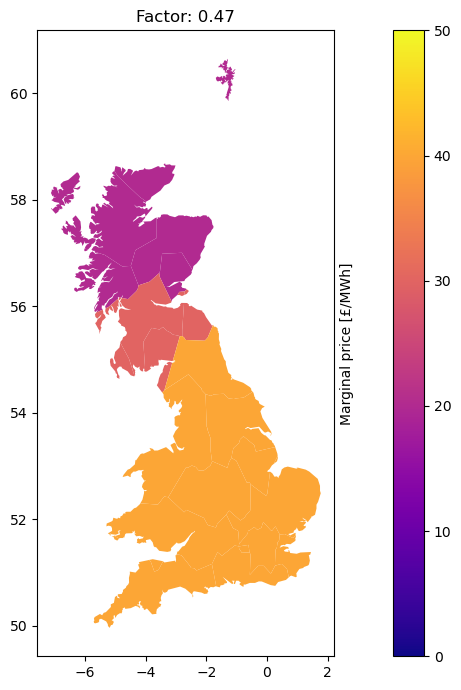

INFO:pypsa.io:Imported network prepared_live_2024-02-07_35_s_eso.nc has buses, carriers, generators, lines, links, loads
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds = self.data.assign_coords({group_dim: idx})
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Li

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-ltagwnwi.lp
Reading time = 0.01 seconds
obj: 266 rows, 119 columns, 420 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 266 rows, 119 columns and 420 nonzeros
Model fingerprint: 0x5e815a84
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 8e+03]
Presolve removed 238 rows and 52 columns
Presolve time: 0.01s
Presolved: 28 rows, 67 columns, 130 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   3.235810e+04   0.000000e+00      0s
      30    1.2534480e+06   0.000000e+00   0.000000e+00      0s

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 119 primals, 266 duals
Objective: 1.25e+06
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


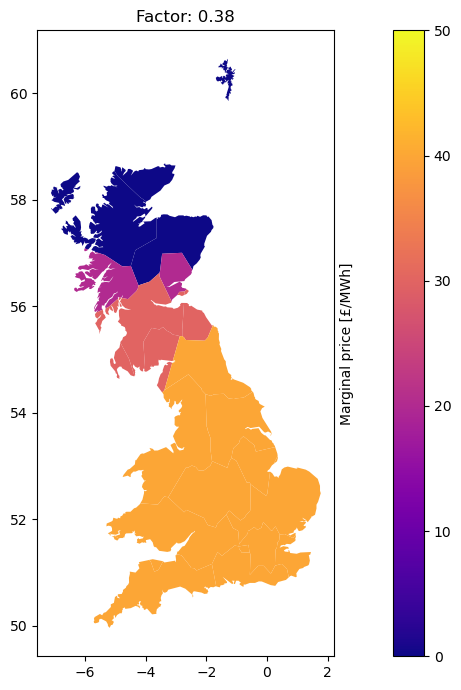

INFO:pypsa.io:Imported network prepared_live_2024-02-07_35_s_eso.nc has buses, carriers, generators, lines, links, loads
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds = self.data.assign_coords({group_dim: idx})
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Li

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-4hakllc0.lp
Reading time = 0.02 seconds
obj: 266 rows, 119 columns, 420 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 266 rows, 119 columns and 420 nonzeros
Model fingerprint: 0xe303a8d4
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 8e+03]
Presolve removed 239 rows and 56 columns
Presolve time: 0.01s
Presolved: 27 rows, 63 columns, 123 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4516897e+04   1.636144e+04   0.000000e+00      0s
      26    1.2968772e+06   0.000000e+00   0.000000e+00      0s

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 119 primals, 266 duals
Objective: 1.30e+06
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


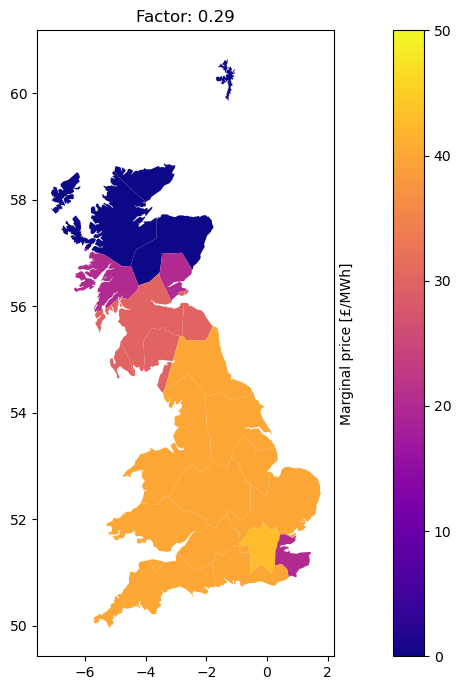

INFO:pypsa.io:Imported network prepared_live_2024-02-07_35_s_eso.nc has buses, carriers, generators, lines, links, loads
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds = self.data.assign_coords({group_dim: idx})
c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Li

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-pl6yi1ja.lp
Reading time = 0.02 seconds
obj: 266 rows, 119 columns, 420 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 266 rows, 119 columns and 420 nonzeros
Model fingerprint: 0x25c6eec3
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e-02, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 8e+03]
Presolve removed 241 rows and 60 columns
Presolve time: 0.01s
Presolved: 25 rows, 59 columns, 112 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1813619e+05   9.860602e+03   0.000000e+00      0s
      24    1.3648593e+06   0.000000e+00   0.000000e+00      0s

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 119 primals, 266 duals
Objective: 1.36e+06
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


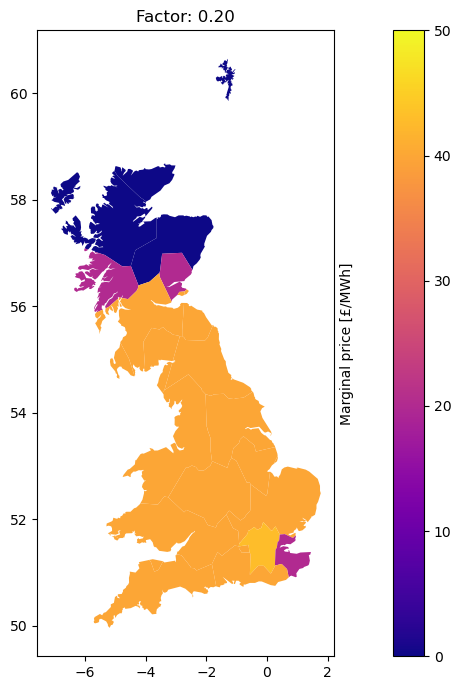

In [33]:

vmaxes = {
    "fti": 6000,
    "eso": 2000,
    "nodal": 100,
}

def zones_to_ax(n, zones, ax):# , vmax):

    # print(n.buses_t.marginal_price)
    price = n.buses_t.marginal_price.T
    price.columns = ["marginal_price"]

    merged = pd.concat((zones.set_index("name"), price), axis=1)
    cbar = merged.plot(column="marginal_price", ax=ax, legend=True, cmap="plasma", vmax=50, vmin=0)
    ax.yaxis.set_label_position("right")
    ax.set_ylabel("Marginal price [£/MWh]")


# for n, z in zip([fti_n, eso_n, nodal_n], [fti, eso, nodal]):

for factor in np.linspace(0.2, 1, 10)[::-1]:

    # fti_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35_s_fti.nc')
    eso_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-02-07_35_s_eso.nc')
    # nodal_n = pypsa.Network(Path.cwd().parent / 'resources' / 'networks' / 'prepared_live_2024-03-02_35_s.nc')

    eso_n.lines.loc[:, "s_nom"] *= factor    

    def fixed_solve(n):
        n.generators.loc[:, "p_nom"] *= n.loads.p_set.sum() / n.generators.p_nom.sum() * 1.8
        n.optimize(solver_name="gurobi")

    # fixed_solve(nodal_n)
    fixed_solve(eso_n)
    # fixed_solve(fti_n)

    fig, ax = plt.subplots(1, 1, figsize=(12, 7))
    ax.set_title(f"Factor: {factor:.2f}")

    zones_to_ax(eso_n, eso, ax)#, vmaxes["nodal"])

    plt.tight_layout()
    plt.show()

In [15]:
print(fti_n.loads.p_set.sum())
print(nodal_n.loads.p_set.sum())

print(fti_n.generators.p_nom.sum())
print(nodal_n.generators.p_nom.sum())

print(eso_n.lines.s_nom.sum())
print(nodal_n.lines.s_nom.sum())
print(eso_n.lines.s_nom.shape)
print(nodal_n.lines.s_nom.shape)


36535.959364531234
36547.99999999955
292287.6749162499
292383.9999999964
149030.8476356489
895056.4805751813
(27,)
(436,)


(<matplotlib.collections.PatchCollection at 0x2358df2b8b0>,
 <matplotlib.collections.LineCollection at 0x2358dfc59f0>)

c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


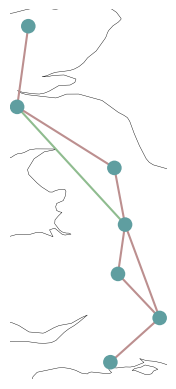

In [18]:
# nodal_n.plot()
fti_n.plot()

In [40]:
nodal_n.lines.columns

Index(['bus0', 'bus1', 'v_nom', 'num_parallel', 'length', 'carrier', 'type',
       's_nom', 'i_nom', 'x', 'r', 'g', 'b', 's_nom_extendable', 's_nom_min',
       's_nom_max', 's_max_pu', 'capital_cost', 'build_year', 'lifetime',
       'terrain_factor', 'v_ang_min', 'v_ang_max', 'sub_network', 'x_pu',
       'r_pu', 'g_pu', 'b_pu', 'x_pu_eff', 'r_pu_eff', 's_nom_opt'],
      dtype='object')

In [42]:
nodal

,name,geometry
0,4950,"POLYGON ((-0.02580 52.25177, -0.03433 52.43810..."
1,4951,"POLYGON ((0.27728 51.86433, 0.17083 51.78695, ..."
2,4952,"POLYGON ((-0.01563 51.61857, -0.00822 51.67576..."
3,4953,"POLYGON ((0.39970 51.60048, 0.34726 51.56454, ..."
4,4955,"POLYGON ((0.41942 51.71046, 0.27728 51.86433, ..."
...,...,...
231,8037,"POLYGON ((-4.00983 55.67678, -4.12927 55.41881..."
232,8283,"POLYGON ((-0.49059 52.94290, 0.01871 52.90504,..."
233,8397,"MULTIPOLYGON (((-3.02184 51.32282, -3.00990 51..."
234,8473,"POLYGON ((-0.72457 52.03590, -0.64784 51.81481..."


In [48]:
nodal_n.buses.loc[nodal_n.buses.index.isin(nodal["name"])]["control"].value_counts()

control
PQ       234
Slack      2
Name: count, dtype: int64

In [50]:
nodal_n.buses

,v_nom,x,y,country,type,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network,generator
Bus,,,,,,,,,,,,,
8838,380.0,-2.169800,53.243852,GB,,AC,,1.0,0.0,inf,PQ,0,NaN
8013,380.0,-2.270050,57.410941,GB,,AC,,1.0,0.0,inf,PQ,0,NaN
8649,380.0,-1.724854,52.571342,GB,,AC,,1.0,0.0,inf,PQ,0,NaN
4950,380.0,0.303497,52.288323,GB,,AC,,1.0,0.0,inf,Slack,0,4950 PV
4951,380.0,0.045319,51.928178,GB,,AC,,1.0,0.0,inf,PQ,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8019,380.0,-4.096050,56.720769,GB,,AC,,1.0,0.0,inf,PQ,0,NaN
7458,380.0,-3.298220,51.515846,GB,,AC,,1.0,0.0,inf,PQ,0,NaN
8283,380.0,-0.027466,52.864985,GB,,AC,,1.0,0.0,inf,PQ,0,NaN
